# تقدير جائحة كوفيد-19

## تحميل البيانات

سنستخدم بيانات الأفراد المصابين بكوفيد-19، المقدمة من [مركز علوم وهندسة الأنظمة](https://systems.jhu.edu/) (CSSE) في [جامعة جونز هوبكنز](https://jhu.edu/). تتوفر مجموعة البيانات في [هذا المستودع على GitHub](https://github.com/CSSEGISandData/COVID-19).


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

يمكننا تحميل أحدث البيانات مباشرة من GitHub باستخدام `pd.read_csv`. إذا لم تكن البيانات متوفرة لسبب ما، يمكنك دائمًا استخدام النسخة المتوفرة محليًا في مجلد `data` - فقط قم بإلغاء تعليق السطر أدناه الذي يحدد `base_url`:


In [125]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [126]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
0        0        0        0        0  ...   152448   152448   152448   
1        0        0        0        0  ...   138132   138790   139324   
2        0        0        0        0  ...   190656   191171   191583   
3        0        0        0        0  ...    14988    14988    14988   
4        0        0        0        0  ...    45583    45817    45945   

   8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  8/29/21  
0   152583   152660   152722   152822   152960   152960   152960  
1   139721   140521   141365   142253   143174   144079   144847  
2   192089   192626   193171   193674   194186   194671   195162  
3    15002    15003    15014    15016    15025    15025    15025  
4    46076    46340    46539    46726    46929    47079    47168  

[5 rows x 590 columns]

يمكننا أن نرى أن كل صف من الجدول يحدد عدد الأفراد المصابين لكل دولة و/أو مقاطعة، والأعمدة تمثل التواريخ. يمكن تحميل جداول مشابهة لبيانات أخرى، مثل عدد المتعافين وعدد الوفيات.


In [127]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## فهم البيانات

من الجدول أعلاه، دور عمود المقاطعة غير واضح. دعونا نلقي نظرة على القيم المختلفة الموجودة في عمود `Province/State`:


In [128]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Xinjiang                        1
Martinique                      1
Guadeloupe                      1
French Polynesia                1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 87, dtype: int64

من الأسماء يمكننا أن نستنتج أن دولًا مثل أستراليا والصين لديها تقسيمات أكثر تفصيلًا حسب المقاطعات. دعونا نبحث عن معلومات عن الصين لنرى المثال:


In [129]:
infected[infected['Country/Region']=='China']

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.2264        1        9   
59         Beijing          China  40.1824  116.4142       14       22   
60       Chongqing          China  30.0572  107.8740        6        9   
61          Fujian          China  26.0789  117.9874        1        5   
62           Gansu          China  35.7518  104.2861        0        2   
63       Guangdong          China  23.3417  113.4244       26       32   
64         Guangxi          China  23.8298  108.7881        2        5   
65         Guizhou          China  26.8154  106.8748        1        3   
66          Hainan          China  19.1959  109.7453        4        5   
67           Hebei          China  39.5490  116.1306        1        1   
68    Heilongjiang          China  47.8620  127.7615        0        2   
69           Henan          China  37.8957  114.9042        5        5   
70       Hong Kong          China  22.3000  114.2000        0        2   
71           Hubei          China  30.9756  112.2707      444      444   
72           Hunan          China  27.6104  111.7088        4        9   
73  Inner Mongolia          China  44.0935  113.9448        0        0   
74         Jiangsu          China  32.9711  119.4550        1        5   
75         Jiangxi          China  27.6140  115.7221        2        7   
76           Jilin          China  43.6661  126.1923        0        1   
77        Liaoning          China  41.2956  122.6085        2        3   
78           Macau          China  22.1667  113.5500        1        2   
79         Ningxia          China  37.2692  106.1655        1        1   
80         Qinghai          China  35.7452   95.9956        0        0   
81         Shaanxi          China  35.1917  108.8701        0        3   
82        Shandong          China  36.3427  118.1498        2        6   
83        Shanghai          China  31.2020  121.4491        9       16   
84          Shanxi          China  37.5777  112.2922        1        1   
85         Sichuan          China  30.6171  102.7103        5        8   
86         Tianjin          China  39.3054  117.3230        4        4   
87           Tibet          China  31.6927   88.0924        0        0   
88         Unknown          China      NaN       NaN        0        0   
89        Xinjiang          China  41.1129   85.2401        0        2   
90          Yunnan          China  24.9740  101.4870        1        2   
91        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
58       15       39       60       70  ...     1008     1008     1008   
59       36       41       68       80  ...     1112     1113     1115   
60       27       57       75      110  ...      603      603      603   
61       10       18       35       59  ...      780      780      780   
62        2        4        7       14  ...      199      199      199   
63       53       78      111      151  ...     3001     3007     3012   
64       23       23       36       46  ...      289      289      289   
65        3        4        5        7  ...      147      147      147   
66        8       19       22       33  ...      190      190      190   
67        2        8       13       18  ...     1317     1317     1317   
68        4        9       15       21  ...     1614     1614     1614   
69        9       32       83      128  ...     1521     1522     1523   
70        2        5        8        8  ...    12049    12052    12057   
71      549      761     1058     1423  ...    68287    68289    68289   
72       24       43       69      100  ...     1181     1181     1181   
73        1        7        7       11  ...      412      412      412   
74        9       18       33       47  ...     1583     1584     1584   
75       18       18       36       72  ...      937      937      937   
76     

## معالجة البيانات

نحن غير مهتمين بتقسيم الدول إلى مناطق إضافية، لذلك سنقوم أولاً بالتخلص من هذا التقسيم وجمع المعلومات لجميع المناطق معًا للحصول على بيانات البلد ككل. يمكن القيام بذلك باستخدام `groupby`:


In [130]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  8/20/21  8/21/21  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...   152448   152448   
Albania               0        0        0        0  ...   138132   138790   
Algeria               0        0        0        0  ...   190656   191171   
Andorra               0        0        0        0  ...    14988    14988   
Angola                0        0        0        0  ...    45583    45817   

                8/22/21  8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
Country/Region                                                                  
Afghanistan      152448   152583   152660   152722   152822   152960   152960   
Albania          139324   139721   140521   141365   142253   143174   144079   
Algeria          191583   192089   192626   193171   193674   194186   194671   
Andorra           14988    15002    15003    15014    15016    15025    15025   
Angola            45945    46076    46340    46539    46726    46929    47079   

                8/29/21  
Country/Region           
Afghanistan      152960  
Albania          144847  
Algeria          195162  
Andorra           15025  
Angola            47168  

[5 rows x 588 columns]

يمكنك أن ترى أنه بسبب استخدام `groupby` أصبحت جميع إطارات البيانات الآن مفهرسة حسب البلد/المنطقة. وبالتالي يمكننا الوصول إلى البيانات الخاصة بدولة معينة باستخدام `.loc`:


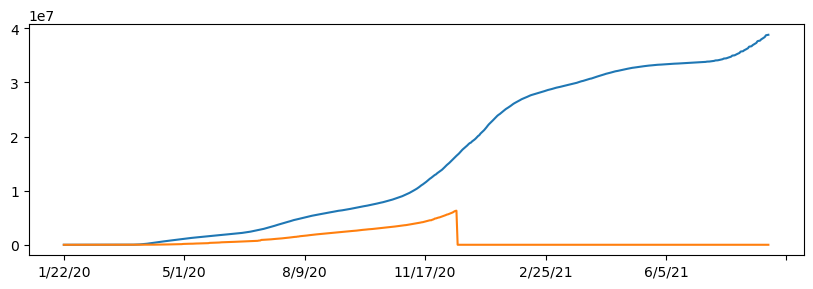

In [131]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

> **ملاحظة** كيف نستخدم `[2:]` لإزالة أول عنصرين من تسلسل يحتوي على الموقع الجغرافي لدولة. يمكننا أيضًا حذف هذين العمودين تمامًا:


In [132]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## التحقيق في البيانات

لننتقل الآن إلى التحقيق في دولة معينة. دعونا ننشئ إطارًا يحتوي على بيانات الإصابات مفهرسة حسب التاريخ:


In [133]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

infected  recovered  deaths
2020-01-22         1          0       0
2020-01-23         1          0       0
2020-01-24         2          0       0
2020-01-25         2          0       0
2020-01-26         5          0       0
...              ...        ...     ...
2021-08-25  38223029          0  632272
2021-08-26  38384360          0  633564
2021-08-27  38707294          0  636720
2021-08-28  38760363          0  637254
2021-08-29  38796746          0  637531

[586 rows x 3 columns]

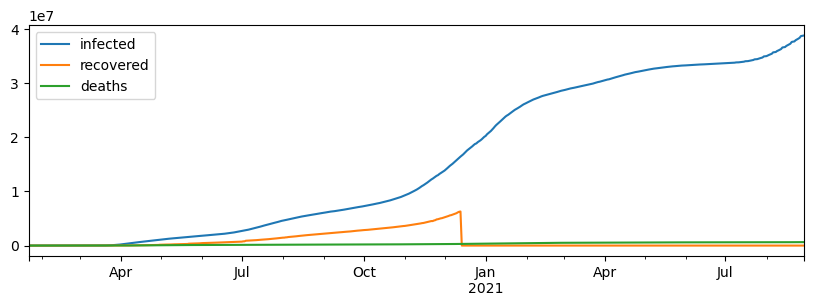

In [134]:
df.plot()
plt.show()

الآن دعونا نحسب عدد الأشخاص المصابين الجدد كل يوم. سيسمح لنا ذلك برؤية سرعة تقدم الوباء. أسهل طريقة للقيام بذلك هي استخدام `diff`:


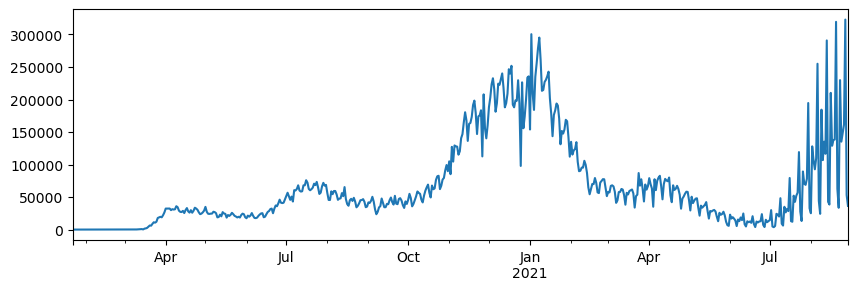

In [135]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

يمكننا رؤية تقلبات كبيرة في البيانات. دعونا ننظر عن كثب إلى أحد الأشهر:


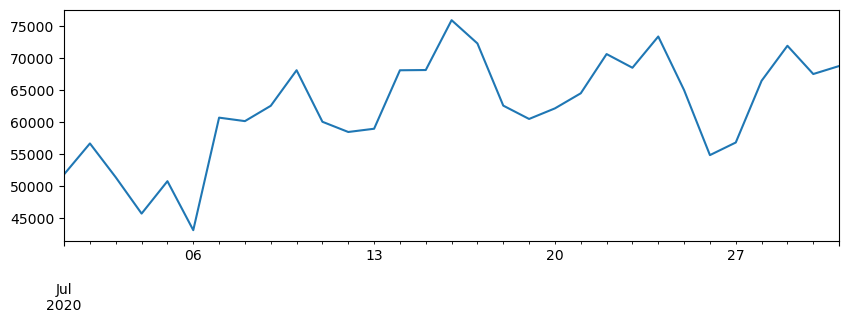

In [136]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

يبدو بوضوح أن هناك تقلبات أسبوعية في البيانات. لأننا نريد أن نتمكن من رؤية الاتجاهات، فمن المنطقي تنعيم المنحنى عن طريق حساب المتوسط المتحرك (أي لكل يوم سنحسب القيمة المتوسطة للأيام السابقة):


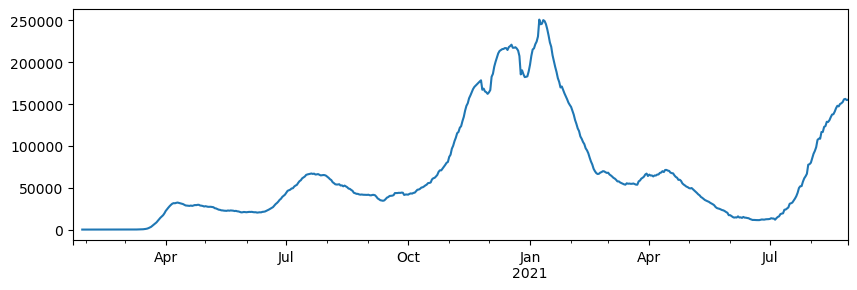

In [137]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

للمقارنة بين عدة دول، قد نرغب في أخذ عدد سكان الدولة في الاعتبار، ومقارنة نسبة الأفراد المصابين بالنسبة لعدد سكان الدولة. للحصول على عدد سكان الدولة، دعونا نقوم بتحميل مجموعة بيانات الدول:


In [138]:
countries = pd.read_csv(countries_dataset_url)
countries

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0            4   AF  AFG    4.0      NaN         NaN            NaN   
1            8   AL  ALB    8.0      NaN         NaN            NaN   
2           12   DZ  DZA   12.0      NaN         NaN            NaN   
3           20   AD  AND   20.0      NaN         NaN            NaN   
4           24   AO  AGO   24.0      NaN         NaN            NaN   
...        ...  ...  ...    ...      ...         ...            ...   
4191  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4192  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4193  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4194  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4195  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0       Afghanistan  33.939110   67.709953              Afghanistan   
1           Albania  41.153300   20.168300                  Albania   
2           Algeria  28.033900    1.659600                  Algeria   
3           Andorra  42.506300    1.521800                  Andorra   
4            Angola -11.202700   17.873900                   Angola   
...             ...        ...         ...                      ...   
4191             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4192             US  43.935225 -110.589080       Teton, Wyoming, US   
4193             US  41.287818 -110.547578       Uinta, Wyoming, US   
4194             US  43.904516 -107.680187    Washakie, Wyoming, US   
4195             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0     38928341.0  
1      2877800.0  
2     43851043.0  
3        77265.0  
4     32866268.0  
...          ...  
4191     42343.0  
4192     23464.0  
4193     20226.0  
4194      7805.0  
4195      6927.0  

[4196 rows x 12 columns]

لأن مجموعة البيانات هذه تحتوي على معلومات عن كل من البلدان والمحافظات، للحصول على عدد سكان البلد بأكمله نحتاج إلى أن نكون أكثر ذكاءً:


In [139]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region   Lat  \
790  840   US  USA  840.0   NaN    NaN            NaN             US  40.0   

     Long_ Combined_Key   Population  
790 -100.0           US  329466283.0

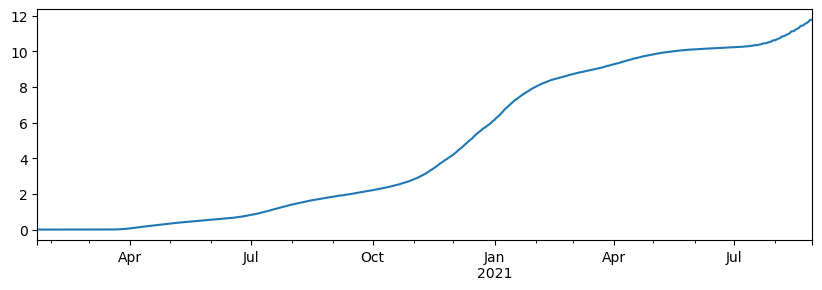

In [140]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

## حساب $R_t$

لمعرفة مدى عدوى المرض، ننظر إلى **رقم التكاثر الأساسي** $R_0$، الذي يشير إلى عدد الأشخاص الذين يمكن أن يصيبهم شخص مصاب. عندما يكون $R_0$ أكبر من 1، فمن المحتمل أن ينتشر الوباء.

$R_0$ هو خاصية للمرض نفسه، ولا يأخذ في الاعتبار بعض التدابير الوقائية التي قد يتخذها الناس لإبطاء انتشار الوباء. خلال تطور الوباء، يمكننا تقدير رقم التكاثر $R_t$ في أي وقت معين $t$. وقد تبين أنه يمكن تقدير هذا الرقم تقريبًا من خلال أخذ نافذة زمنية مدتها 8 أيام، وحساب $$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$
حيث $I_t$ هو عدد الأفراد المصابين حديثًا في اليوم $t$.

دعونا نحسب $R_t$ لبيانات الوباء الخاصة بنا. للقيام بذلك، سنأخذ نافذة متحركة من 8 قيم `ninfected`، ونطبق الدالة لحساب النسبة المذكورة أعلاه:


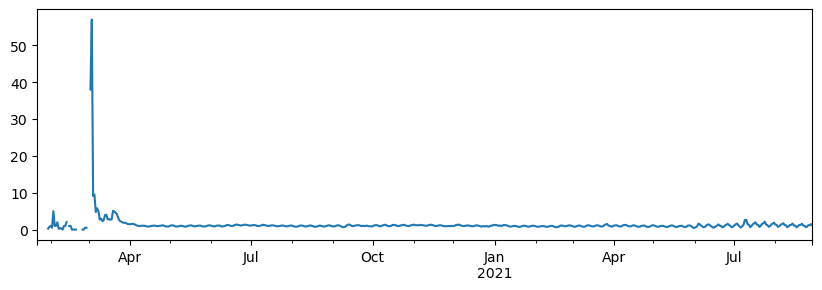

In [141]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

يمكنك ملاحظة وجود بعض الفجوات في الرسم البياني. قد تكون هذه الفجوات ناتجة عن وجود قيم `NaN` أو `inf` في مجموعة البيانات. يمكن أن تظهر `inf` نتيجة القسمة على 0، بينما تشير `NaN` إلى بيانات مفقودة أو عدم توفر بيانات لحساب النتيجة (كما هو الحال في بداية الإطار الزمني لدينا، حيث لم تكن نافذة التمرير بعرض 8 متاحة بعد). لجعل الرسم البياني أكثر وضوحًا، نحتاج إلى ملء هذه القيم باستخدام دالتي `replace` و `fillna`.

دعونا نلقي نظرة أعمق على بداية الجائحة. سنقوم أيضًا بتقييد قيم المحور y لعرض القيم التي تقل عن 6 فقط، لتحسين الرؤية، ورسم خط أفقي عند القيمة 1.


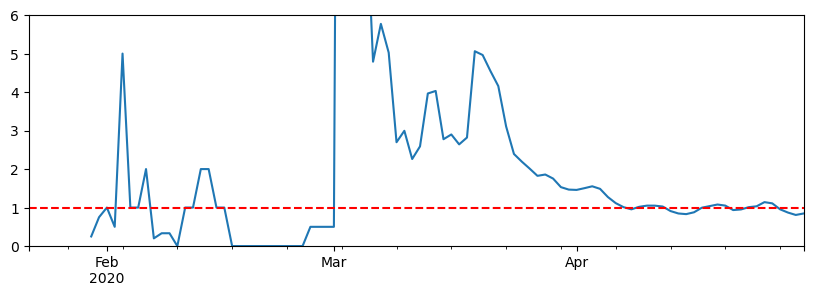

In [142]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

مؤشر آخر مثير للاهتمام للجائحة هو **المشتق** أو **الفرق اليومي** في الحالات الجديدة. يتيح لنا رؤية واضحة عندما تكون الجائحة في تزايد أو تناقص.


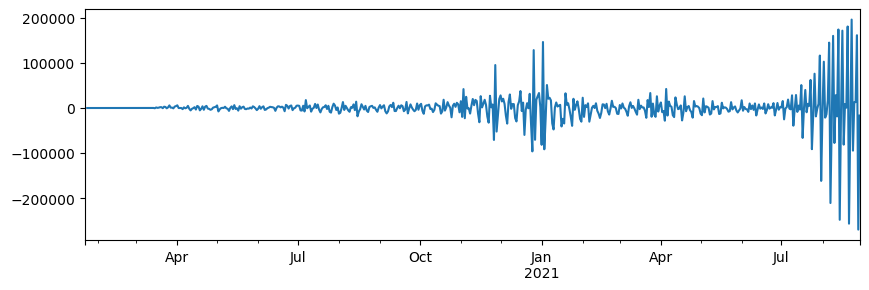

In [143]:
df['ninfected'].diff().plot()
plt.show()

نظرًا لوجود الكثير من التقلبات في البيانات الناتجة عن الإبلاغ، فمن المنطقي تنعيم المنحنى عن طريق تشغيل المتوسط المتحرك للحصول على الصورة العامة. دعونا نركز مرة أخرى على الأشهر الأولى من الجائحة:


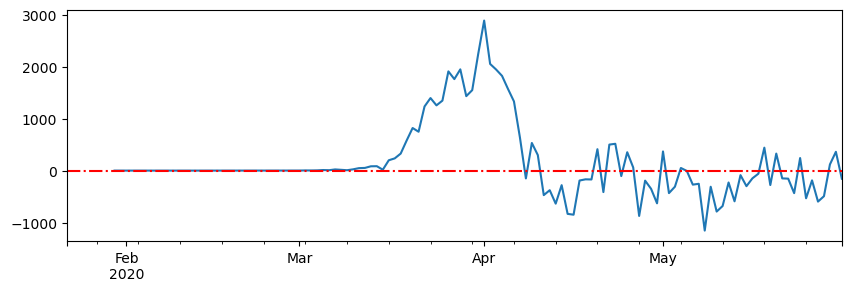

In [150]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

## التحدي

حان الوقت الآن لتجربة المزيد مع الكود والبيانات! إليك بعض الاقتراحات التي يمكنك تجربتها:
* استكشاف انتشار الجائحة في دول مختلفة.
* رسم مخططات $R_t$ لعدة دول على مخطط واحد للمقارنة، أو إنشاء عدة مخططات بجانب بعضها البعض.
* دراسة كيفية ارتباط عدد الوفيات وحالات التعافي بعدد الحالات المصابة.
* محاولة معرفة مدة استمرار المرض النموذجي من خلال الربط البصري بين معدل الإصابة ومعدل الوفيات والبحث عن بعض الشذوذات. قد تحتاج إلى النظر في دول مختلفة لاكتشاف ذلك.
* حساب معدل الوفيات وكيف يتغير مع مرور الوقت. قد ترغب في أخذ مدة المرض بالأيام في الاعتبار لتحريك سلسلة زمنية واحدة قبل إجراء الحسابات.


## المراجع

يمكنك الاطلاع على دراسات إضافية حول انتشار وباء COVID في المنشورات التالية:
* [Sliding SIR Model لتقدير Rt خلال جائحة COVID](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/)، منشور مدونة بواسطة [Dmitry Soshnikov](http://soshnikov.com)
* T.Petrova, D.Soshnikov, A.Grunin. [تقدير الرقم التكاثري المتغير مع الزمن لتفشي COVID-19 العالمي](https://www.preprints.org/manuscript/202006.0289/v1). *Preprints* **2020**، 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [الكود الخاص بالورقة أعلاه على GitHub](https://github.com/shwars/SlidingSIR)



---

**إخلاء المسؤولية**:  
تم ترجمة هذا المستند باستخدام خدمة الترجمة بالذكاء الاصطناعي [Co-op Translator](https://github.com/Azure/co-op-translator). بينما نسعى لتحقيق الدقة، يرجى العلم أن الترجمات الآلية قد تحتوي على أخطاء أو معلومات غير دقيقة. يجب اعتبار المستند الأصلي بلغته الأصلية المصدر الرسمي. للحصول على معلومات حاسمة، يُوصى بالاستعانة بترجمة بشرية احترافية. نحن غير مسؤولين عن أي سوء فهم أو تفسيرات خاطئة تنشأ عن استخدام هذه الترجمة.
